In [3]:
%matplotlib inline
import numpy as np
import scipy as sci
import scipy.odr as odr
from scipy.optimize import curve_fit as cf
import pandas as pd
import matplotlib.pyplot as plt

def dataToNpArray(data,line):
    return np.array(data.values[:,line]).astype(float)


def cfGaus(x,mu,sigma,A,b):
    return(A*np.exp(-(x-mu)**2/(2*sigma**2))+b)


def myGaus(B,x):
    mu,sigma,A,b=B
    return(A*np.exp(-(x-mu)**2/(2*sigma**2)))+b

left
right
left
right
[ 1.37606589e+04 -4.92060567e+00  1.21391552e+03 -1.41347518e-01]
[ 1.37605712e+04 -4.89074620e+00  1.22510581e+03  1.39270348e-01]
13720 13802
hi
Beta: [ 1.37605712e+04 -4.89074620e+00  1.22510581e+03  1.39270348e-01]
Beta Std Error: [0.51490858 0.23993028 3.11054944 0.46008503]
Beta Covariance: [[ 2.83844859e-02  1.25166270e-06  2.64536773e-03  2.45270679e-05]
 [ 1.25166270e-06  6.16298202e-03 -1.37008359e-03  2.23455862e-03]
 [ 2.64536773e-03 -1.37008359e-03  1.03584550e+00 -2.24830919e-02]
 [ 2.45270679e-05  2.23455862e-03 -2.24830919e-02  2.26619345e-02]]
Residual Variance: 9.340695864937375
Inverse Condition #: 1.1635393693040782e-05
Reason(s) for Halting:
  Iteration limit reached


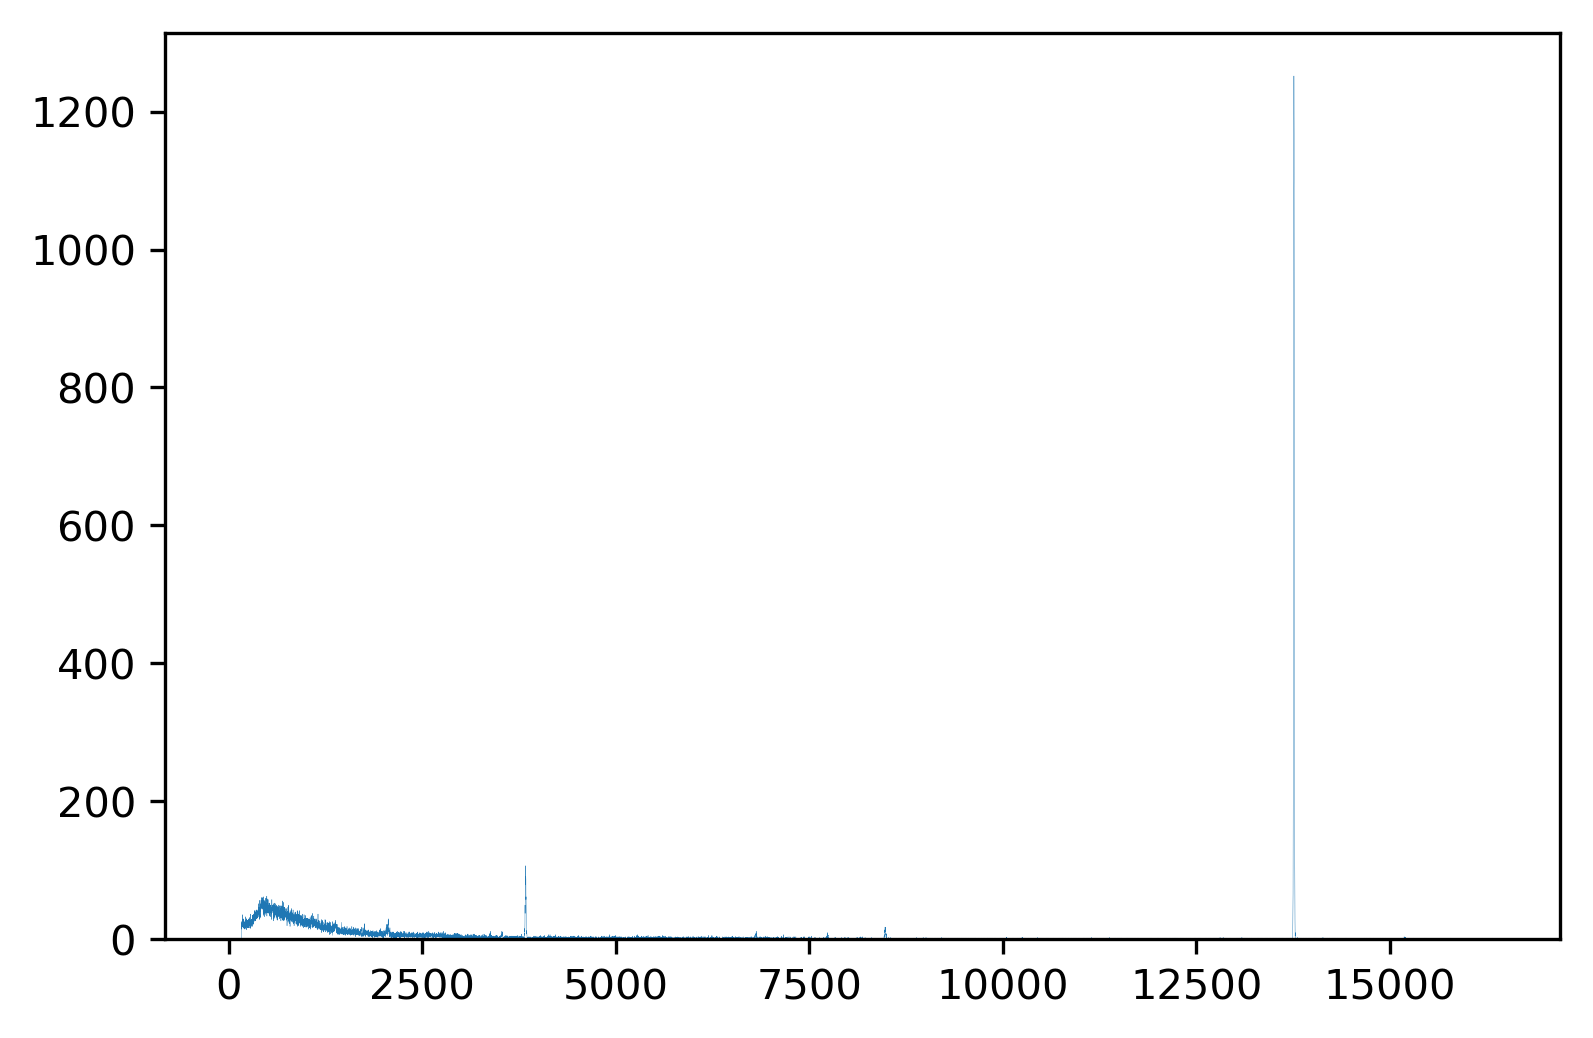

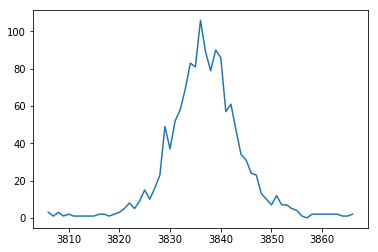

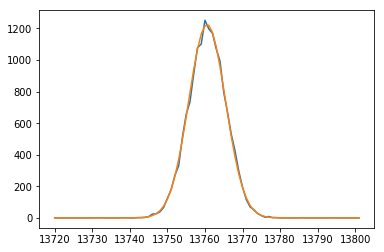

In [13]:
data=pd.read_table("SS18/Gr 23/Totzeit.TKA",skiprows=2)
values=dataToNpArray(data,0)
fig,ax=plt.subplots(dpi=300)
ax.plot(range(len(values)),values,"-",ms=.1,lw=.1)
#ax.semilogy()
ax.set_ylim(0)

def findpeaks(data,minval, width,fit=True,plot=True):
    leftbound=-1
    rightbound=-1
    returnlist=[]
    for i in range(len(data)):
        #breite finden die größer ist als der angegebene wert

        if(data[i]>minval and leftbound==-1):
            leftbound=i-width
            print("left")
        if(data[i]<minval and leftbound !=-1 and rightbound==-1):
            rightbound=i+width
            print("right")
            returnlist.append([leftbound,rightbound])
            leftbound=-1
            rightbound=-1
    if(plot):
        for x,y in bounds:
            fig,ax=plt.subplots()
            ax.plot(range(x,y),values[x:y])
    if(fit):
        pass
    return (returnlist)
bounds=findpeaks(values,100,30,plot=False)

for x,y in bounds:
    fig,ax=plt.subplots()
    ax.plot(range(x,y),values[x:y])
    left,right=x,y

gaus=odr.Model(myGaus)
mydata=odr.Data(x=np.array(range(left,right)),y=values[left:right])

popt,pcov=cf(cfGaus,np.array(range(left,right)),values[left:right],p0=(13760,1,1.8,0))
print(popt)
myodr=odr.ODR(mydata,gaus,beta0=popt)
output=myodr.run()
 
beta=output.beta
print(beta)
print(left,right)
ax.plot(range(left,right),myGaus(beta,np.array(range(left,right))))
print("hi")
output.pprint()

##### 

In [5]:
import lmfit as lm

In [6]:
gmodel=lm.Model(cfGaus)
gmodel.independent_vars
print(gmodel.param_names)
parms=gmodel.make_params(mu=13760,sigma=1,A=1.8,b=0)

['mu', 'sigma', 'A', 'b']


In [7]:
result=gmodel.fit((values[left:right]),parms,x=np.array(range(left,right)))

172.1104344961632


Text(0.5,1,'Totzeitkorrektur')

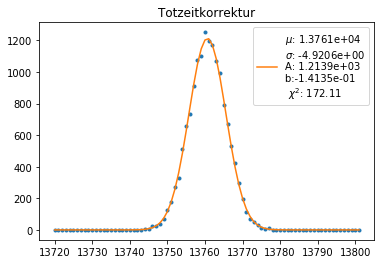

In [8]:
#print(result.fit_report())
redchi=result.redchi
fig,ax=plt.subplots()
ax.plot(np.array(range(left,right)),values[left:right],".")
ax.plot(np.array(range(left,right)),result.best_fit,c="C1",label="$\mu$: {:.4e} \n$\sigma$: {:.4e}\nA: {:.4e} \nb:{:.4e} \n $\chi^2$: {:.2f} ".format(*result.best_values.values(),redchi))
print(result.redchi)
ax.legend()
ax.set_title("Totzeitkorrektur")

In [9]:
for x in values:
    if(type(x)!=np.float64):
        print("no")
values=list(values)

16381
[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 12567
    # variables        = 4
    chi-square         = 1832097.08
    reduced chi-square = 145.832769
    Akaike info crit   = 62618.5811
    Bayesian info crit = 62648.3364
[[Variables]]
    A: -0.00150666 +/- 6.6735e-06 (0.44%) (init = -0.001)
    c:  731.947984 +/- 5.78862168 (0.79%) (init = 500)
    b:  54934.2204 +/- 1715.86284 (3.12%) (init = 50)
    d: -0.88283854 +/- 0.27948723 (31.66%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, d) = -0.901
    C(c, b) = -0.827
    C(c, d) =  0.791
    C(A, b) = -0.550
    C(A, d) =  0.370

[0. 0. 0. ... 0. 0. 0.]


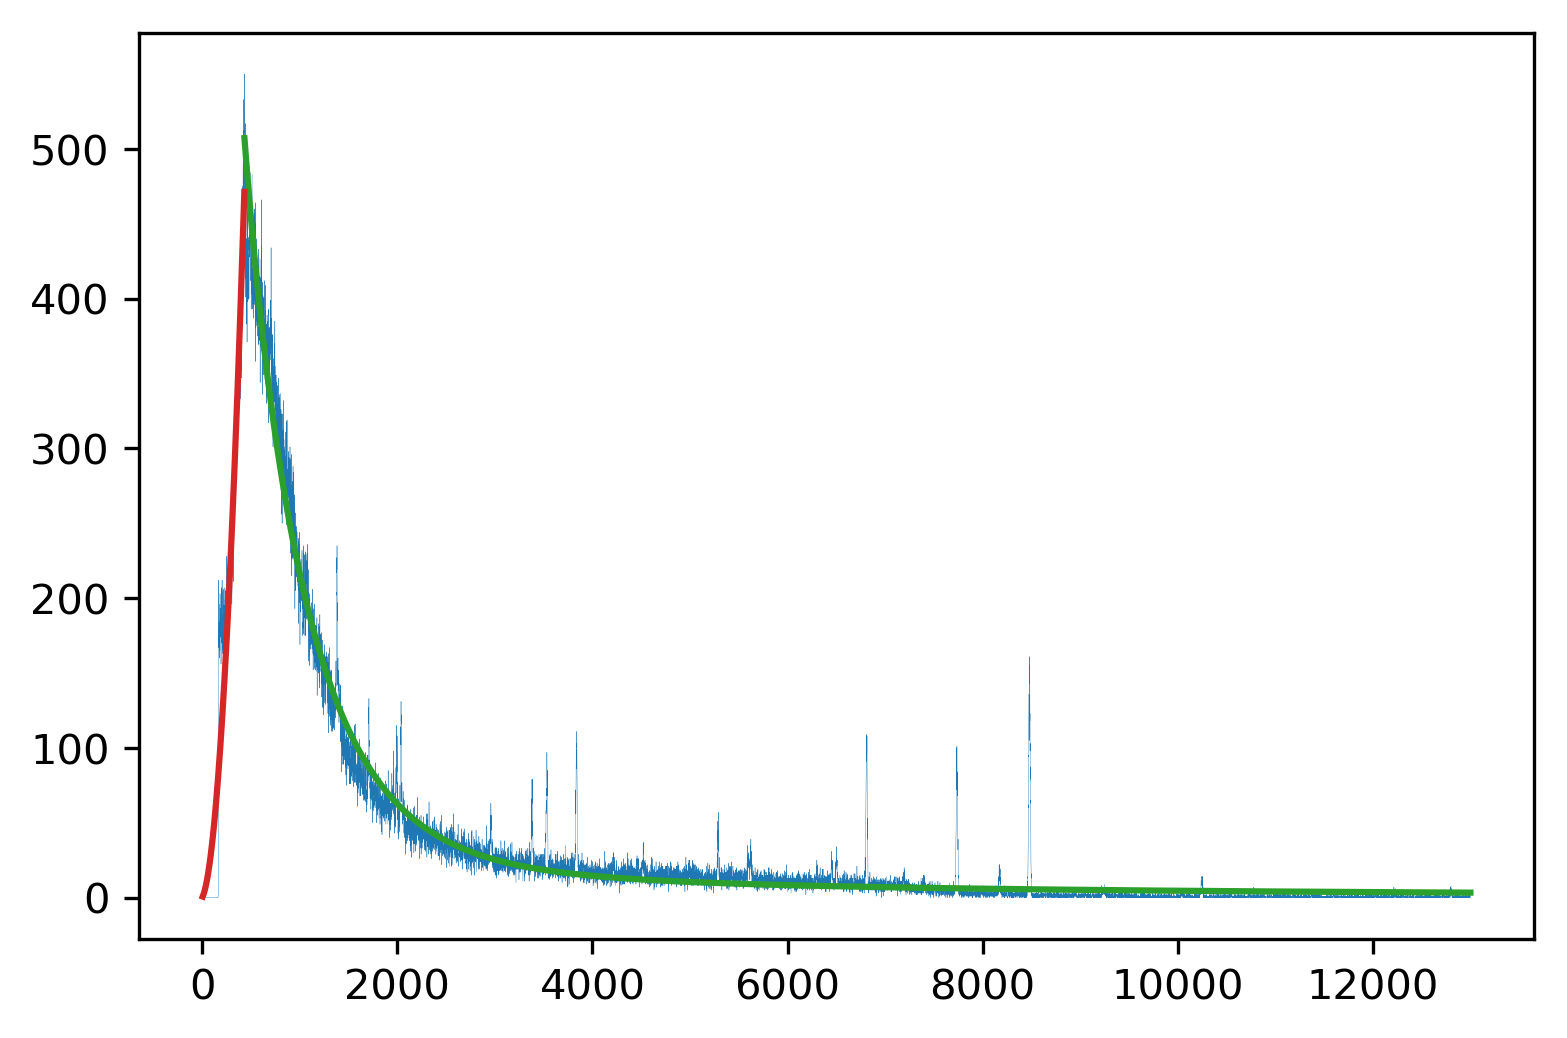

In [10]:
#Correct the background

data=pd.read_table("SS18/Gr 23/hintergrund.TKA",skiprows=2)
values=dataToNpArray(data,0)
fig,ax=plt.subplots(dpi=300)
values=values.astype(float)
print(len(values))
maxval=13000

ax.plot(range(maxval),values[:maxval],"-",ms=.1,lw=.1)
exp=lambda x,A,c,b,d:c*np.exp(x*A)+b/x+d
x=np.array(range(np.argmax(values[:maxval]),maxval))
y=values[np.argmax(values[:maxval]):maxval]

ax.plot(x,exp(x,*popt))
expmodel=lm.Model(exp)
parms=expmodel.make_params(A=-.001,c=500,b=50,d=1)
result=expmodel.fit(values[np.argmax(values[:maxval]):maxval],parms,x=np.array(range(np.argmax(values[:maxval]),maxval)))
print(result.fit_report())
ax.plot(np.array(range(np.argmax(values[:maxval]),maxval)),result.best_fit)
argmax=np.argmax(values[:maxval])


print(values)
square=lm.Model(lambda x,a,m:x**2*a+m*x)
parms2=square.make_params(a=1,m=1)
result=square.fit(list(values[5:np.argmax(values[:maxval])]),parms2,x=np.array(range(5,np.argmax(values[:maxval]))))
ax.plot(range(5,argmax),result.best_fit)